![example](images/director_shot.jpeg)

# Insights and Analysis for Microsoft's New Movie Studio 


**Author:** Yessy Rayner
***

## Overview

This project analyses the trend and popularity as well as profitability of Top 5 movie genres. We will use exploratory data analysis to generate actionable insights and recommendations for the head of Microsoft's new movie studio

## Business Problem

Microsoft sees all the big companies creating their own original video content and would like to get into the business by creating their own movie studio. However they don’t have any experience in producing movies. Therefore, this project will explore types/genres of movies that are currently doing the best at the box office and translate those findings into actionable insights that Microsoft's new movie studio can use to help decide what type of movies to produce.

## Data Understanding

For this project, I will be using two data sets from IMDb. IMDb is a popular online databases of information related to films, TV and more. The datas that I use are based on the movies produced from 2010 to 2019, we are not using the datas from 2020-2021 due to COVID-19 pandemic which might skewed the findings as movies weren't doing well during the pandemic. The two IMDb datas will be merged in order to yield for Top Rated movies. Top rates movies can be used to measure popularity and longetivity. And have the potential of residual income down the track such as franchise potential, DVD, merchandise and online streaming etc.

We will also explore datas from The-Numbers movie budget (tn_movie_budgets) which contain production budget/cost. The reason that I use this data is due to some movies seems to do well in the box office, however due to high production cost, some movies made a big loss, for example Dark Phoenix (2019) which made a total loss of $157M (We will come across this later during data preparation in this project).


In [1]:
# Import standard packages
import pandas as pd
import numpy as np

In [2]:
# Reviewing all 3 data sets and see if any need cleaning/tidy up required
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
imdbrating_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdbtitle_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [3]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
tn_df.info()
# Need to convert the currency (last 3 columns) into float using str.replace function on STEP 2 - Data Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
imdbrating_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
imdbrating_df.info()
# Perfect data, no missing value and and all 3 columns are in correct data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
imdbrating_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [8]:
imdbrating_df.nlargest(50, 'numvotes')
#YR Notes: Keep data with minimum 20,000 to 30,000 votes (Popularity)

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
39356,tt0993846,8.2,1035358
3140,tt1130884,8.1,1005960
25777,tt2015381,8.1,948394
60518,tt1431045,8.0,820847
63506,tt1392170,7.2,795227


In [9]:
imdbtitle_df.head()
#Data looks okay, cleaning may not required, but check for duplication

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Data Preparation: Merging & Cleaning

In this section, I will be merging 2x IMDb datasets first, in case these datas need analysing prior merging with tn_movie_budgets. All 3 datasets have different amount of value attached to it, but the main goal is to see which genres made the most net profit (gross profits less production cost), as well as the most popular based on the highest amount of votes and rating above 6. 

Therefore at the end of this process, I will be dropping the following:

1. Datas that has less than 20,000 votes and rating under 6.0
2. Datas that are missing genre and production cost
3. Duplicated datas, which I came across at the later stage of this Data Preparation process

In [10]:
# Merge 2 IMDb datas first in order to yield for highes rating & popularity
# Then merge the combined IMDb datas with tn_movie_budgets, but first some data need to be tidied up

imdbtitle_df.info()
#YR Notes: Some data missing in genres, will review once all 3 datas are merged and remove missing value if irrelevant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
#First step: Merging two imdb datas and use 'tconst' as index
#Keep data with minimum 30,000 votes to remove the skewed datas, e.g. some movies have average rating 8.5 with only 30 votes
imdbtitle_df.set_index('tconst', inplace=True)

In [12]:
imdbrating_df.set_index('tconst', inplace=True)

In [13]:
imdbrating_df.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [14]:
imdb_overall_df = imdbtitle_df.join(imdbrating_df, how='left')
imdb_overall_df.info()
#Datas merged - See below, almost 50% of datas missing on averagerating and numvotes, going to drop the missing datas

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 13.9+ MB


In [15]:
imdb_overall_df.sort_values (by='numvotes', ascending=False)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0
tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0
tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
...,...,...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


In [16]:
imdb_overall_df.nlargest(50, 'numvotes')
#Top 50 movies with largest number of votes, at a glance Action & Adventure genre is popular

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0
tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0
tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358.0
tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960.0
tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394.0
tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847.0


In [17]:
#Rename one of the column title to 'movie' in order to merge with tn_df to get the most profitable movies/genres
imdb_overall_df.rename(columns = {'original_title' : 'movie'}, inplace=True)

In [18]:
#Remove duplicated datas (Over 13751 datas were duplicated)
imdb_overall_df[imdb_overall_df.duplicated(['movie'], keep=False)]

,primary_title,movie,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32.0
tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery",4.0,12.0
tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",6.7,236.0
tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219.0
tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",6.7,77.0
...,...,...,...,...,...,...,...
tt9913418,Fragments,Fragments,2019,NaN,"Drama,Mystery,Sci-Fi",NaN,NaN
tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller",NaN,NaN
tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",NaN,NaN


In [19]:
#Create a new data subset with rating above 6 and number of votes above 50000.
imdb_toprating = (imdb_overall_df['averagerating'] > 6) & (imdb_overall_df['numvotes'] > 30000)
imdb_toprating = imdb_overall_df[imdb_toprating]

In [20]:
imdb_toprating.info()
#New data set yield 1170 datas only

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, tt0337692 to tt9495224
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1170 non-null   object 
 1   movie            1170 non-null   object 
 2   start_year       1170 non-null   int64  
 3   runtime_minutes  1170 non-null   float64
 4   genres           1170 non-null   object 
 5   averagerating    1170 non-null   float64
 6   numvotes         1170 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.1+ KB


In [21]:
imdb_toprating['genres'].value_counts()

Comedy,Drama,Romance          49
Adventure,Animation,Comedy    46
Action,Adventure,Sci-Fi       45
Comedy,Drama                  41
Drama                         40
                              ..
Comedy,Crime,Documentary       1
Animation,Drama,Family         1
Comedy,Musical,Romance         1
Drama,History,Musical          1
Action,Biography,Crime         1
Name: genres, Length: 206, dtype: int64

In [22]:
#Merging IMDB & TN Datas to yield for most profitable movies + best rating/popularity
#however need to convert some objects in tn_movie to float value first
#TN data, convert all 3 currency columns into float then ADD another column calculating NET PROFIT
#Use movie title as index when merging
tn_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [23]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
#To see how the str being printed - need to remove $ and , first, then change type to float.
tn_df.iloc[0]['production_budget']

'$425,000,000'

In [26]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '')
tn_df['production_budget'] = tn_df['production_budget'].astype(float)

In [27]:
tn_df.iloc[0]['worldwide_gross']
#Also tested 'domestic_gross' all values are in the same format as above
#Therefore will use the same method to convert both columns from object into float

'$2,776,345,279'

In [28]:
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].astype(float)

In [29]:
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype(float)

In [30]:
tn_df.info()
#Now the last 3 columns are in float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [31]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [32]:
#Adding an extra column for total gross
total_gross_sum = tn_df['domestic_gross'] + tn_df['worldwide_gross']
tn_df['total_gross'] = total_gross_sum

In [33]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


In [34]:
#Adding another column for net_gross
net_gross_sum = tn_df['total_gross'] - tn_df['production_budget']
tn_df['net_gross'] = net_gross_sum
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09


In [35]:
#Dropping id & release date as I won't need them when merging with IMDb - IMBd has the movie release year already
tn_df.drop(columns = ['id', 'release_date'], inplace=True)

In [36]:
tn_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09


In [37]:
#When I ran the most net profit, realised there are some duplicates, therefore removing them as below
tn_df[tn_df.duplicated(['movie'], keep=False)]

,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
26,The Avengers,225000000.0,623279547.0,1.517936e+09,2.141215e+09,1.916215e+09
38,Robin Hood,210000000.0,105487148.0,3.224590e+08,4.279462e+08,2.179462e+08
39,King Kong,207000000.0,218080025.0,5.505174e+08,7.685974e+08,5.615974e+08
50,Alice in Wonderland,200000000.0,334191110.0,1.025491e+09,1.359682e+09,1.159682e+09
64,The Mummy,195000000.0,80101125.0,4.099539e+08,4.900550e+08,2.950550e+08
...,...,...,...,...,...,...
5668,Cat People,134000.0,4000000.0,8.000000e+06,1.200000e+07,1.186600e+07
5676,Night of the Living Dead,114000.0,12087064.0,3.008706e+07,4.217413e+07,4.206013e+07
5677,The Birth of a Nation,110000.0,10000000.0,1.100000e+07,2.100000e+07,2.089000e+07
5699,The Last House on the Left,87000.0,3100000.0,3.100000e+06,6.200000e+06,6.113000e+06


In [38]:
tn_df.drop_duplicates(subset=['movie'], inplace=True)

In [39]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5698 non-null   object 
 1   production_budget  5698 non-null   float64
 2   domestic_gross     5698 non-null   float64
 3   worldwide_gross    5698 non-null   float64
 4   total_gross        5698 non-null   float64
 5   net_gross          5698 non-null   float64
dtypes: float64(5), object(1)
memory usage: 311.6+ KB


In [40]:
#Finally merging tn_df & IMDb combined data set
finalmovie_df = pd.merge(tn_df, imdb_overall_df)
finalmovie_df.columns

Index(['movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'total_gross', 'net_gross', 'primary_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [41]:
finalmovie_df.head(1000)

,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,Justice League,300000000.0,229024295.0,6.559452e+08,8.849695e+08,5.849695e+08,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Concussion,35000000.0,34531832.0,5.036379e+07,8.489562e+07,4.989562e+07,Concussion,2017,NaN,Documentary,NaN,NaN
996,The Foreigner,35000000.0,34393507.0,1.407834e+08,1.751769e+08,1.401769e+08,The Foreigner,2017,113.0,"Action,Thriller",7.0,81288.0
997,The Foreigner,35000000.0,34393507.0,1.407834e+08,1.751769e+08,1.401769e+08,The Foreigner,2011,145.0,Action,NaN,NaN
998,The Foreigner,35000000.0,34393507.0,1.407834e+08,1.751769e+08,1.401769e+08,The Foreigner,2012,100.0,"Comedy,Romance",6.8,1526.0


In [42]:
#Dropping some of the columns, as I already have movie titles and net_gross
finalmovie_df.drop(columns = ['primary_title', 'total_gross'], inplace=True)

In [43]:
finalmovie_df.describe()

,production_budget,domestic_gross,worldwide_gross,net_gross,start_year,runtime_minutes,averagerating,numvotes
count,3.358000e+03,3.358000e+03,3.358000e+03,3.358000e+03,3358.000000,2921.000000,2535.000000,2.535000e+03
mean,3.362453e+07,4.062462e+07,9.567149e+07,1.026716e+08,2014.279929,97.625813,6.243669,7.156551e+04
std,4.564454e+07,7.039855e+07,1.896252e+08,2.247380e+08,2.696375,26.848688,1.193368,1.373013e+05
min,1.400000e+03,0.000000e+00,0.000000e+00,-1.574753e+08,2010.000000,1.000000,1.600000,5.000000e+00
25%,4.900000e+06,4.512898e+05,2.003254e+06,-1.199349e+06,2012.000000,87.000000,5.600000,2.055000e+02
50%,1.700000e+07,1.460936e+07,2.493813e+07,2.032678e+07,2014.000000,98.000000,6.400000,1.355000e+04
75%,4.000000e+07,4.996909e+07,9.665832e+07,1.040837e+08,2016.000000,112.000000,7.100000,8.351950e+04
max,4.106000e+08,7.000596e+08,2.208208e+09,2.667572e+09,2021.000000,360.000000,9.300000,1.841066e+06


In [44]:
finalmovie_df
#This is the section where I mentioned earlier that some movies made losses even though the gross amounts look profitable
#See Dark Phoenix, Red 11, Bang for example

,movie,production_budget,domestic_gross,worldwide_gross,net_gross,start_year,runtime_minutes,genres,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08,2011,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,Justice League,300000000.0,229024295.0,6.559452e+08,5.849695e+08,2017,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...
3353,Cure,10000.0,94596.0,9.459600e+04,1.791920e+05,2014,NaN,NaN,NaN,NaN
3354,Bang,10000.0,527.0,5.270000e+02,-8.946000e+03,2015,NaN,NaN,NaN,NaN
3355,Newlyweds,9000.0,4584.0,4.584000e+03,1.680000e+02,2011,95.0,"Comedy,Drama",6.4,1436.0
3356,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43.0


In [45]:
finalmovie_df.nsmallest(10, 'net_gross')

,movie,production_budget,domestic_gross,worldwide_gross,net_gross,start_year,runtime_minutes,genres,averagerating,numvotes
1,Dark Phoenix,350000000.0,42762350.0,149762350.0,-157475300.0,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
258,Men in Black: International,110000000.0,3100000.0,3100000.0,-103800000.0,2019,115.0,"Action,Adventure,Comedy",NaN,NaN
349,Bright,90000000.0,0.0,0.0,-90000000.0,2017,117.0,"Action,Crime,Fantasy",6.4,147834.0
146,Mars Needs Moms,150000000.0,21392758.0,39549758.0,-89057484.0,2011,88.0,"Adventure,Animation,Family",5.4,19823.0
374,Call of the Wild,82000000.0,0.0,0.0,-82000000.0,2020,NaN,"Adventure,Animation,Family",NaN,NaN
402,Renegades,77500000.0,0.0,1521672.0,-75978328.0,2017,106.0,"Action,Adventure,Crime",5.4,7095.0
340,The Promise,90000000.0,8224288.0,10551417.0,-71224295.0,2017,NaN,Drama,NaN,NaN
341,The Promise,90000000.0,8224288.0,10551417.0,-71224295.0,2017,NaN,Comedy,8.8,53.0
342,The Promise,90000000.0,8224288.0,10551417.0,-71224295.0,2016,133.0,"Drama,History",6.1,164555.0
343,The Promise,90000000.0,8224288.0,10551417.0,-71224295.0,2016,74.0,Documentary,NaN,NaN


In [46]:
#Removed more duplicated datas, I believe I didn't run "inplace=True" on previous duplicate checks, hence some still show up
finalmovie_df[finalmovie_df.duplicated(['movie'], keep=False)]

,movie,production_budget,domestic_gross,worldwide_gross,net_gross,start_year,runtime_minutes,genres,averagerating,numvotes
26,Robin Hood,210000000.0,105487148.0,322459006.0,217946154.0,2010,140.0,"Action,Adventure,Drama",6.6,239480.0
27,Robin Hood,210000000.0,105487148.0,322459006.0,217946154.0,2013,92.0,"Action,Drama",6.3,78.0
28,Robin Hood,210000000.0,105487148.0,322459006.0,217946154.0,2018,116.0,"Action,Adventure,Thriller",5.3,41588.0
29,Robin Hood,210000000.0,105487148.0,322459006.0,217946154.0,2018,NaN,NaN,7.6,5.0
30,Robin Hood,210000000.0,105487148.0,322459006.0,217946154.0,2017,60.0,"Action,Adventure,History",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3342,Ten,25000.0,0.0,0.0,-25000.0,2013,118.0,Drama,5.5,31.0
3343,Ten,25000.0,0.0,0.0,-25000.0,2014,83.0,"Adventure,Horror,Mystery",5.4,623.0
3344,Ten,25000.0,0.0,0.0,-25000.0,2017,82.0,"Horror,Mystery,Thriller",4.7,191.0
3352,Cure,10000.0,94596.0,94596.0,179192.0,2011,93.0,Drama,4.9,11.0


In [47]:
finalmovie_df.drop_duplicates(subset=['movie'], inplace=True)

In [48]:
finalmovie_df.info()
#Now we have 2267 movies to work with that have all of the datas that I wanted e.g. genres, net_gross

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 0 to 3357
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2267 non-null   object 
 1   production_budget  2267 non-null   float64
 2   domestic_gross     2267 non-null   float64
 3   worldwide_gross    2267 non-null   float64
 4   net_gross          2267 non-null   float64
 5   start_year         2267 non-null   int64  
 6   runtime_minutes    2093 non-null   float64
 7   genres             2241 non-null   object 
 8   averagerating      1971 non-null   float64
 9   numvotes           1971 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 194.8+ KB


In [49]:
#I am going to filter datas using below methods average rating 6 and above and minimum 20000 number of votes
Top_rating = (finalmovie_df['averagerating'] > 5.9) & (finalmovie_df['numvotes'] > 20000)
finalmovie_df.loc [Top_rating]

,movie,production_budget,domestic_gross,worldwide_gross,net_gross,start_year,runtime_minutes,genres,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08,2011,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,Justice League,300000000.0,229024295.0,6.559452e+08,5.849695e+08,2017,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...
3234,Like Crazy,250000.0,3395391.0,3.728400e+06,6.873791e+06,2011,86.0,"Drama,Romance",6.7,55841.0
3276,Weekend,190000.0,484592.0,1.577585e+06,1.872177e+06,2011,97.0,"Drama,Romance",7.6,25424.0
3282,Another Earth,175000.0,1321194.0,2.102779e+06,3.248973e+06,2011,92.0,"Drama,Romance,Sci-Fi",7.0,85839.0
3294,Your Sister's Sister,120000.0,1597486.0,3.090593e+06,4.568079e+06,2011,90.0,"Comedy,Drama",6.7,24780.0


In [50]:
#Then adding another filter for movies that made at least $5M as a measure of great success.
Top_profit = (finalmovie_df['averagerating'] > 5.9) & (finalmovie_df['numvotes'] > 20000) & (finalmovie_df['net_gross'] > 5000000)
Top_profit = finalmovie_df.loc [Top_profit]

In [51]:
Top_profit.describe()

,production_budget,domestic_gross,worldwide_gross,net_gross,start_year,runtime_minutes,averagerating,numvotes
count,7.040000e+02,7.040000e+02,7.040000e+02,7.040000e+02,704.000000,704.000000,704.000000,7.040000e+02
mean,6.335133e+07,9.072327e+07,2.314478e+08,2.588197e+08,2013.691761,113.661932,6.946023,2.031713e+05
std,6.515896e+07,1.019445e+08,2.822806e+08,3.325263e+08,2.515418,17.189991,0.602188,1.965313e+05
min,2.500000e+05,8.270300e+04,3.324070e+06,5.377031e+06,2010.000000,80.000000,6.000000,2.074600e+04
25%,1.675000e+07,2.656065e+07,5.071596e+07,5.227580e+07,2012.000000,101.000000,6.400000,7.738850e+04
50%,3.725000e+07,5.494121e+07,1.171174e+08,1.314535e+08,2014.000000,111.000000,6.900000,1.366420e+05
75%,9.150000e+07,1.175849e+08,2.896860e+08,3.183866e+08,2016.000000,124.000000,7.400000,2.592992e+05
max,4.106000e+08,7.000596e+08,2.048134e+09,2.426950e+09,2019.000000,180.000000,8.800000,1.841066e+06


In [52]:
Top_profit.head()

,movie,production_budget,domestic_gross,worldwide_gross,net_gross,start_year,runtime_minutes,genres,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08,2011,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,Justice League,300000000.0,229024295.0,6.559452e+08,5.849695e+08,2017,120.0,"Action,Adventure,Fantasy",6.5,329135.0
5,Spectre,300000000.0,200074175.0,8.796209e+08,7.796951e+08,2015,148.0,"Action,Adventure,Thriller",6.8,352504.0


In [53]:
#Now I will measure & count the genres
Top_profit['genres'].value_counts()

Adventure,Animation,Comedy    40
Action,Adventure,Sci-Fi       39
Comedy,Drama,Romance          27
Comedy,Drama                  27
Action,Adventure,Fantasy      22
                              ..
Biography,Drama,Musical        1
Drama,Mystery                  1
Action,Biography,Comedy        1
Adventure,Biography,Comedy     1
Comedy,Drama,Sport             1
Name: genres, Length: 154, dtype: int64

In [54]:
#As some movies were in 2 or more genres, I will be using str count to measure
#instead of separating the genres, as it might skewed with my net_profit calculation, I understand this method will cause
#some duplication, but I will average it out
Top_profit['genres'].str.contains('Drama').sum()

351

In [55]:
Top_profit['genres'].str.contains('Action').sum()

254

In [56]:
Top_profit['genres'].str.contains('Comedy').sum()

251

In [57]:
Top_profit['genres'].str.contains('Adventure').sum()

213

In [58]:
Top_profit['genres'].str.contains('Thriller').sum()

123

In [59]:
#I have checked other genres as well (Thriller Sci_Fi, Horror, Fantasy & Western), there are all under 100 movies
#Therefore, the 5 genres in this section are my Top 5 and will be used in my Step 3 - Data Modelling/Analysis process
Top_profit['genres'].str.contains('Action,Adventure').sum()

125

## Data Modeling: Analysing Top Datas

I create a new subset of data called Top_genres_df which contains the average of net_profit, number of votes and rating for the Top 5 genres, which will offer future business insights and recommedation.


In [60]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Import numpy to generate some dummy data
import numpy as np
%matplotlib inline

In [61]:
#First I created data set for each genre, in order to create the new subset called Top_genres_df, which will make it easier 
#during visualisation, as I would like to keep the codes simple and easy to read
Action_Adventure = Top_profit['genres'].str.contains('Action,Adventure')
Action_Adventure = Top_profit.loc [Action_Adventure]

In [62]:
Action_Adventure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 2820
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              125 non-null    object 
 1   production_budget  125 non-null    float64
 2   domestic_gross     125 non-null    float64
 3   worldwide_gross    125 non-null    float64
 4   net_gross          125 non-null    float64
 5   start_year         125 non-null    int64  
 6   runtime_minutes    125 non-null    float64
 7   genres             125 non-null    object 
 8   averagerating      125 non-null    float64
 9   numvotes           125 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 10.7+ KB


In [63]:
Action_Adventure['net_gross'].sum() / 125

562516036.56

In [64]:
Drama = Top_profit['genres'].str.contains('Drama')
Drama = Top_profit.loc [Drama]

In [65]:
Drama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 26 to 3234
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              351 non-null    object 
 1   production_budget  351 non-null    float64
 2   domestic_gross     351 non-null    float64
 3   worldwide_gross    351 non-null    float64
 4   net_gross          351 non-null    float64
 5   start_year         351 non-null    int64  
 6   runtime_minutes    351 non-null    float64
 7   genres             351 non-null    object 
 8   averagerating      351 non-null    float64
 9   numvotes           351 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 30.2+ KB


In [66]:
Drama['net_gross'].sum() / 351

131986344.57264957

In [67]:
Action = Top_profit['genres'].str.contains('Action')
Action = Top_profit.loc [Action]

In [68]:
Action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 3016
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              254 non-null    object 
 1   production_budget  254 non-null    float64
 2   domestic_gross     254 non-null    float64
 3   worldwide_gross    254 non-null    float64
 4   net_gross          254 non-null    float64
 5   start_year         254 non-null    int64  
 6   runtime_minutes    254 non-null    float64
 7   genres             254 non-null    object 
 8   averagerating      254 non-null    float64
 9   numvotes           254 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 21.8+ KB


In [69]:
Action['net_gross'].sum() / 254

371448810.62598425

In [70]:
Comedy = Top_profit['genres'].str.contains('Comedy')
Comedy = Top_profit.loc [Comedy]

In [71]:
Comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 10 to 3101
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              251 non-null    object 
 1   production_budget  251 non-null    float64
 2   domestic_gross     251 non-null    float64
 3   worldwide_gross    251 non-null    float64
 4   net_gross          251 non-null    float64
 5   start_year         251 non-null    int64  
 6   runtime_minutes    251 non-null    float64
 7   genres             251 non-null    object 
 8   averagerating      251 non-null    float64
 9   numvotes           251 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 21.6+ KB


In [72]:
Comedy.head()

,movie,production_budget,domestic_gross,worldwide_gross,net_gross,start_year,runtime_minutes,genres,averagerating,numvotes
10,Tangled,260000000.0,200821936.0,5.864772e+08,5.272992e+08,2010,100.0,"Adventure,Animation,Comedy",7.8,366366.0
24,Men in Black 3,215000000.0,179020854.0,6.542135e+08,6.182343e+08,2012,106.0,"Action,Adventure,Comedy",6.8,309879.0
36,Finding Dory,200000000.0,486295561.0,1.021215e+09,1.307511e+09,2016,97.0,"Adventure,Animation,Comedy",7.3,213542.0
37,Toy Story 3,200000000.0,415004880.0,1.068880e+09,1.283884e+09,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0
42,Monsters University,200000000.0,268488329.0,7.435883e+08,8.120767e+08,2013,104.0,"Adventure,Animation,Comedy",7.3,291887.0


In [73]:
Comedy['net_gross'].sum() / 251

239093026.24701196

In [74]:
Adventure = Top_profit['genres'].str.contains('Adventure')
Adventure = Top_profit.loc [Adventure]

In [75]:
Adventure.describe()

,production_budget,domestic_gross,worldwide_gross,net_gross,start_year,runtime_minutes,averagerating,numvotes
count,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,213.000000,213.000000,213.000000,2.130000e+02
mean,1.290221e+08,1.672515e+08,4.717571e+08,5.099866e+08,2014.028169,115.488263,6.930047,2.779586e+05
std,7.161112e+07,1.335635e+08,3.586885e+08,4.440199e+08,2.620520,18.300843,0.618152,2.433304e+05
min,1.800000e+06,4.210454e+06,5.837111e+06,7.047565e+06,2010.000000,87.000000,6.000000,2.203300e+04
25%,7.500000e+07,6.518760e+07,1.976876e+08,1.659578e+08,2012.000000,100.000000,6.400000,9.415500e+04
50%,1.300000e+08,1.301784e+08,3.931513e+08,3.861585e+08,2014.000000,114.000000,6.900000,2.157610e+05
75%,1.750000e+08,2.326419e+08,6.663794e+08,7.362744e+08,2016.000000,129.000000,7.300000,3.712040e+05
max,4.106000e+08,7.000596e+08,2.048134e+09,2.426950e+09,2019.000000,169.000000,8.800000,1.841066e+06


In [76]:
Adventure.mean()

production_budget    1.290221e+08
domestic_gross       1.672515e+08
worldwide_gross      4.717571e+08
net_gross            5.099866e+08
start_year           2.014028e+03
runtime_minutes      1.154883e+02
averagerating        6.930047e+00
numvotes             2.779586e+05
dtype: float64

In [77]:
# Finally creating new subset data based on Top 5 Genres finding above - using average .mean() scores
# For the number of movies, I tried to use value_counts() but it didn't work, hence manually adding them as they are easily
# accesible above on the info() section

Top_genres_df = pd.DataFrame ({'Top_genres': ['Drama', 'Action', 'Comedy', 'Adventure', 'Action_Adventure'],
                              'average_profit': [Drama['net_gross'].mean(), Action['net_gross'].mean(), Comedy['net_gross'].mean(), Adventure['net_gross'].mean(), Action_Adventure['net_gross'].mean()],
                              'average_production_cost': [Drama['production_budget'].mean(), Action['production_budget'].mean(), Comedy['production_budget'].mean(), Adventure['production_budget'].mean(), Action_Adventure['production_budget'].mean()],
                              'average_rating': [Drama['averagerating'].mean(), Action['averagerating'].mean(), Comedy['averagerating'].mean(), Adventure['averagerating'].mean(), Action_Adventure['averagerating'].mean()],
                              'average_votes': [Drama['numvotes'].mean(), Action['numvotes'].mean(), Comedy['numvotes'].mean(), Adventure['numvotes'].mean(), Action_Adventure['numvotes'].mean()],
                              'num_movies': [351, 254, 251, 213, 125],
                              })

In [78]:
#Voila...my new data for visualisation
Top_genres_df

,Top_genres,average_profit,average_production_cost,average_rating,average_votes,num_movies
0,Drama,1.319863e+08,3.434583e+07,7.117094,174004.299145,351
1,Action,3.714488e+08,9.989232e+07,6.869291,262366.539370,254
2,Comedy,2.390930e+08,5.062072e+07,6.817131,149402.043825,251
3,Adventure,5.099866e+08,1.290221e+08,6.930047,277958.624413,213
4,Action_Adventure,5.625160e+08,1.457856e+08,6.940800,335016.432000,125


### Most Profitable Genre

From the analysis conducted above and graph below, Action & Adventure genre yields the most average net profit at $509M, followed by Adventure, Action, Comedy and Drama.

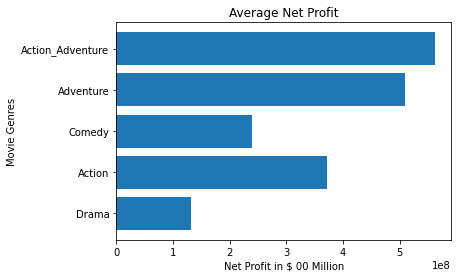

In [79]:
import matplotlib.pyplot as ply

genres = Top_genres_df['Top_genres']
profit = Top_genres_df['average_profit']

plt.barh(genres, profit)

plt.title('Average Net Profit')
plt.xlabel('Net Profit in $ 00 Million')
plt.ylabel ('Movie Genres')

plt.savefig("./images/net_profit.png", dpi=150)
plt.show()

### Production Cost Insights

Although Action & Adventure genre yields the most profit, but it also cost the most to produce at 145M, comparing to Drama genre only cost 34M in production (Approx. 76% cost less comparing to Action & Adventure genres). See graphs below for more insights.

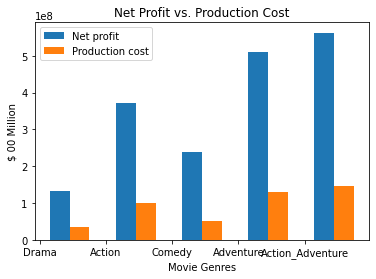

In [80]:
import matplotlib.pyplot as ply
import numpy as np 

genres = Top_genres_df['Top_genres']
profit = Top_genres_df['average_profit']
production = Top_genres_df['average_production_cost']

x_axis = np.arange(len(genres))
           
plt.bar(x_axis +0.30, profit, width=0.3, label = 'Net profit')
plt.bar(x_axis +0.60, production, width=0.3, label = 'Production cost')

plt.title('Net Profit vs. Production Cost')
plt.ylabel('$ 00 Million')
plt.xlabel ('Movie Genres')
           
plt.xticks(x_axis, genres)

plt.legend()
plt.savefig("./images/profit_production_cost.png", dpi=150)
plt.show()

### Popularity based on number of votes

The popularity is consistent with the net profit with Action & Adventure genres are getting the most votes, comparing to the rest of the genres.

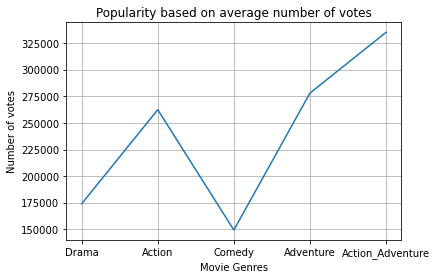

In [81]:
import matplotlib.pyplot as ply

genres = Top_genres_df['Top_genres']
popularity = Top_genres_df['average_votes']

plt.plot(genres, popularity)

plt.title('Popularity based on average number of votes')
plt.ylabel('Number of votes')
plt.xlabel ('Movie Genres')

plt.savefig("./images/popularity_based_on_votes.png", dpi=150)
plt.grid()
plt.show()

### Number of Genres Made it to Top 700

Drama made the highest genre in my Top 700 findings with 351 movies are listed under drama, compared to 125 movies listed under Action & Adventure.

Although Drama made the less profit in my Top 5 Genres, nonetheless it is still making a whopping $131M on average in profit per movie. With the highest number of movies fall under Drama, it is proven that this genre is more consistent in making profit. 

Only 125 movies fall under Action & Adventure genres, this genre is a high risk investment due to huge production cost and possibility of making losses. For examples, Dark Phoenix, MIB: International, and Renegades made 157M, 103M and 75M losses respectively. However when this genre is done right and produced properly, it will yield the most profit.

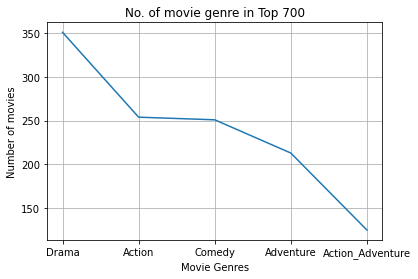

In [82]:
import matplotlib.pyplot as ply

genres = Top_genres_df['Top_genres']
movies = Top_genres_df['num_movies']

plt.plot(genres, movies)

plt.title('No. of movie genre in Top 700')
plt.ylabel('Number of movies')
plt.xlabel ('Movie Genres')

plt.savefig("./images/genres_top_700.png", dpi=150)
plt.grid()
plt.show()

## Conclusions

This analysis leads to three recommendations for Microsoft's new movie studio:

- Depending on production budget, I recommend to invest in Drama and/or Comedy. These two genres are low risk investment, cost less to produce but yield consistent profit.
- It is best to target both domestic and international audiences in order to get maximum profit.
- If budget allowed, do consider investing in Action & Adventure genres due to its highest profit and popularity. However further research are a must on writer, producer, director and cast.


## Next Steps

Further analyses could yield additional insights to maximise profitability and popularity of the movies produced by Microsoft's new movie studio:

- Due to datas were based 2010-2019, I suggest to analyse similar datas for 2022 at the end of this year to see if there are any changes on trends and further findings.
- Further research are required in term of cast, producer, director, writer, and crew on whatever genres that Microsoft's new studio decided to produce, as it will affect the profitability.
- Research on the movies that made losses in the past 10 years and learn how to avoid those losses.